# Initial Data Preprocessing

### Importing the pakcages used

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Spitting the entire data set into seperate series that correspond to each ID at the head of the file

In [3]:
with open('../../../data/sample_data.csv', 'r') as csvfile:
    lines = csvfile.readlines()
    header = lines[0]
    ids = [ int( id[:-6] ) for id in header.split(',')[2:] ]
    
    counts = { i: [] for i in range(8) }
    for line in lines[3:]:
        parts = line.split(',')
        date, time = parts[0], parts[1]
        vals = parts[2:]
        for i in range(len(vals)):
            if vals[i] != '-' and vals[i] != '-\n':
                res = ( date, time, float(vals[i]) )
                counts[i].append(res)
                continue
                
    data = { ids[k] : v for k, v in counts.items() }
    for k,v in data.items():
        print(f'id {k} has {len(v)} data points')
        print('These are the first 5 if its data points')
        print(*v[:5], sep='\n')
        print()

id 115800 has 0 data points
These are the first 5 if its data points


id 114922 has 91 data points
These are the first 5 if its data points
('11/5/2019', '12:06:50 AM', 46.90379333)
('11/5/2019', '12:07:20 AM', 46.90552139)
('11/5/2019', '12:07:53 AM', 46.90725327)
('11/5/2019', '12:08:26 AM', 46.90901184)
('11/5/2019', '12:08:58 AM', 46.9107399)

id 114923 has 42 data points
These are the first 5 if its data points
('11/5/2019', '12:06:47 AM', 46.93207169)
('11/5/2019', '12:07:21 AM', 46.93388367)
('11/5/2019', '12:07:54 AM', 46.93569565)
('11/5/2019', '12:08:27 AM', 46.93753433)
('11/5/2019', '12:08:59 AM', 46.9393425)

id 119154 has 329 data points
These are the first 5 if its data points
('11/5/2019', '12:07:39 AM', 7.401049804)
('11/5/2019', '12:08:11 AM', 7.391618162)
('11/5/2019', '12:08:44 AM', 7.486317649)
('11/5/2019', '12:09:17 AM', 7.445248168)
('11/5/2019', '12:09:49 AM', 7.452170569)

id 119163 has 639 data points
These are the first 5 if its data points
('11/5/2019', '1

### Functions to save the seperated data into individual files, named using its ID

In [4]:
def write_csv(file_name, data_rows):
    with open(f'../../../data/generated/{file_name}.csv', 'w') as output:
        lines = [ f'{date} {time},{val}\n' for date, time, val in data_rows ]
        output.writelines(lines)
        print(f'wrote {len(lines)} lines in file "data/generated/{file_name}.csv"')

In [5]:
def write_files():
    for k, v in data.items():
        write_csv(f'{k}', v)
        
write_files()

wrote 0 lines in file "data/generated/115800.csv"
wrote 91 lines in file "data/generated/114922.csv"
wrote 42 lines in file "data/generated/114923.csv"
wrote 329 lines in file "data/generated/119154.csv"
wrote 639 lines in file "data/generated/119163.csv"
wrote 320 lines in file "data/generated/119062.csv"
wrote 320 lines in file "data/generated/119063.csv"
wrote 320 lines in file "data/generated/119064.csv"


### Using the generated files and converting them to pandas Series objects

In [6]:
series = []

for k, v in data.items():
    if len(v) < 1:
        continue
    sr = pd.Series.from_csv(f'../../../data/generated/{k}.csv')
    series.append(sr)

C:\Programs\Anaconda\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


### Plotting the Series objects using line plots or Kernel Density Plots

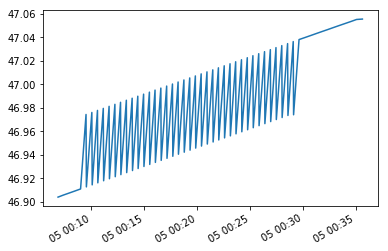

In [7]:
series[0].plot()
# series[0].plot(kind='kde')

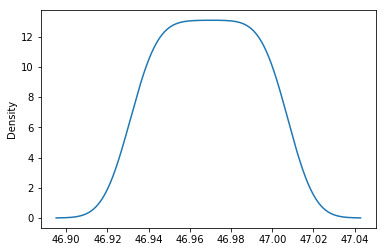

In [8]:
# series[1].plot()
series[1].plot(kind='kde')

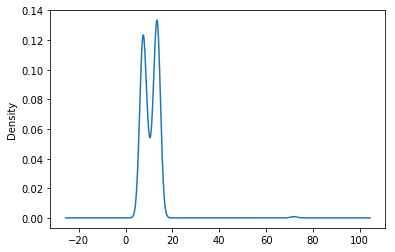

In [9]:
# series[2].plot()
series[2].plot(kind='kde')

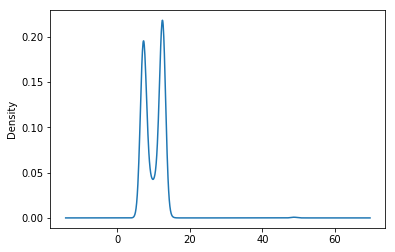

In [10]:
# series[3].plot()
series[3].plot(kind='kde')

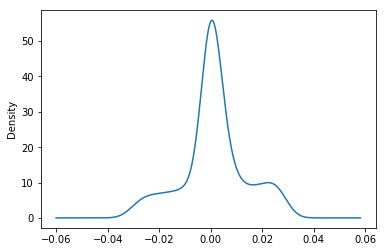

In [11]:
# series[4].plot()
series[4].plot(kind='kde')

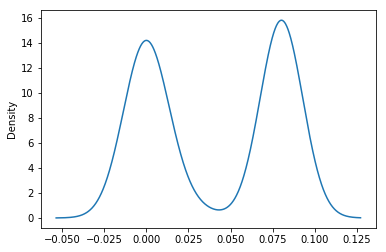

In [12]:
# series[5].plot()
series[5].plot(kind='kde')

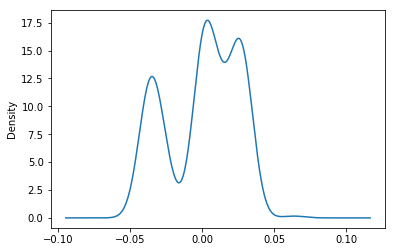

In [13]:
# series[6].plot()
series[6].plot(kind='kde')

In [66]:
type(series[0].index)

pandas.core.indexes.datetimes.DatetimeIndex

In [68]:
def prepare_for_scatter(series):
    x = series.index
    y = list(series.data)
    temp = []
    for datetime in x:
        temp.append( datetime - x[0] )
    x = [ t.seconds for t in temp ]
    return x, y

C:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.data is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


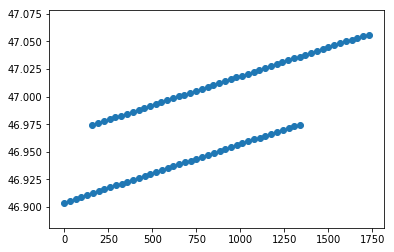

In [71]:
x, y = prepare_for_scatter(series[0])
plt.scatter(x, y)

In [ ]:
for ser in series:
    x, y = prepare_for_scatter(ser)
    plt